# Clusterizacão

Utilizando a base:

https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

- Execute os algoritmos de agrupamento K-means e Hierárquico com diferentes valores de clusters e escolha o melhor resultado.

- Para o hierárquico, varie entre o single e complete linkage e analise os resultados obtidos.

- Para o k-means, inicialize os centroides aleatoriamente e avalie o impacto da inicialização nos resultados encontrados.


- **Bônus**: normalizar os dados e executar novamente os algoritmos para analisar os resultados gerados. Fazer visualização dos clusters encontrados com PCA ou t-SNE.

## Importando Pacotes

In [54]:
# Data Preprocessing Packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import re

# Data Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

# Models
import sklearn
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import decomposition
from scipy.cluster.hierarchy import dendrogram

## Adquirindo o Dataset

In [2]:
df = pd.read_csv('Live.csv',encoding = 'utf-8')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
status_id           7050 non-null object
status_type         7050 non-null object
status_published    7050 non-null object
num_reactions       7050 non-null int64
num_comments        7050 non-null int64
num_shares          7050 non-null int64
num_likes           7050 non-null int64
num_loves           7050 non-null int64
num_wows            7050 non-null int64
num_hahas           7050 non-null int64
num_sads            7050 non-null int64
num_angrys          7050 non-null int64
Column1             0 non-null float64
Column2             0 non-null float64
Column3             0 non-null float64
Column4             0 non-null float64
dtypes: float64(4), int64(9), object(3)
memory usage: 881.4+ KB


In [4]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [5]:
df.describe(include= 'object')

,status_id,status_type,status_published
count,7050,7050,7050
unique,6997,4,6913
top,819700534875473_967787160066809,photo,3/20/2018 1:54
freq,2,4288,3


### Sobre os dados, informações adquiridas fora do dataset:

1. Status_id: Identificador do *post*.
2. Status_type: Tipo do *post*.
3. Status_published: Data e hora do momento em que o *post* foi enviado.
4. num_reactions: Número de reações.
5. num_comments: Número de comentários.
6. num_shares: Número de shares.	
7. num_likes: Número de likes.
8. num_loves: Número de loves.
9. num_wows: Número de wows.
10. num_hahas: Número de hahas.
11. num_sads: Número de sads.
12. num_angrys: Número de angrys.


disponível em: https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

As primeiras observações a serem feitas com a informação que temos até o momento são:

1. Existem quatro colunas com valores ausentes.
<br />
<br />
2. O status_published, uma marca temporal, não está definido como timestamp do pandas.
<br />
<br />
3. Existem identificadores duplicados.

## Limpeza de dados:

### Removendo colunas com dados ausentes, identificadores e duplicatas:

In [15]:
data = data.drop_duplicates()
data = df.drop(columns = ['status_id','Column1','Column2','Column3','Column4'])

data.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


### Parsing da marca temporal:

In [16]:
def parse_timestamp(df, datetime):
    df[datetime] = pd.to_datetime(df[datetime])
    df['Year'] = df[datetime].dt.year
    df['Month'] = df[datetime].dt.month
    df['Weekday'] = df[datetime].dt.weekday
    df['Hour'] = df[datetime].dt.hour
    
parse_timestamp(data,'status_published')
data.drop(columns = 'status_published',inplace = True)
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Year,Month,Weekday,Hour
0,video,529,512,262,432,92,3,1,1,0,2018,4,6,6
1,photo,150,0,0,150,0,0,0,0,0,2018,4,5,22
2,video,227,236,57,204,21,1,1,0,0,2018,4,5,6
3,photo,111,0,0,111,0,0,0,0,0,2018,4,5,2
4,photo,213,0,0,204,9,0,0,0,0,2018,4,2,3


### Verificando correlação entre os atributos para remover atributos com correlação maior que 0.8:

In [17]:
data.corr().style.background_gradient(cmap='coolwarm')

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Year,Month,Weekday,Hour
num_reactions,1,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326,-0.0427028,-0.114712,0.0219282,0.0170162
num_comments,0.150843,1,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184,0.132399,0.021358,-0.0106681,0.00251486
num_shares,0.250723,0.640637,1,0.172492,0.82,0.407628,0.399826,0.19997,0.312513,0.189782,-0.0234997,0.00911674,-0.0509174
num_likes,0.994923,0.101687,0.172492,1,0.209308,0.2078,0.120784,0.0521688,0.0874307,-0.0655282,-0.111233,0.0225714,0.0213752
num_loves,0.305003,0.521223,0.82,0.209308,1,0.508798,0.50783,0.2076,0.371001,0.204702,-0.0598967,0.00287714,-0.0427047
num_wows,0.267752,0.162394,0.407628,0.2078,0.508798,1,0.287756,0.0865027,0.183087,0.10153,-0.062339,-0.00290722,-0.0028164
num_hahas,0.176028,0.325048,0.399826,0.120784,0.50783,0.287756,1,0.141421,0.21191,0.113236,-0.0382838,-0.0192503,-0.00696425
num_sads,0.075138,0.236453,0.19997,0.0521688,0.2076,0.0865027,0.141421,1,0.142072,0.0674456,0.0230398,-0.00784746,0.0209184
num_angrys,0.124326,0.225184,0.312513,0.0874307,0.371001,0.183087,0.21191,0.142072,1,0.100654,-0.0265553,-0.002909,-0.0123271
Year,-0.0427028,0.132399,0.189782,-0.0655282,0.204702,0.10153,0.113236,0.0674456,0.100654,1,-0.230947,-0.0229415,-0.0301982


In [18]:
data.drop(columns = ['num_likes','num_shares'],inplace = True)
data.head()

,status_type,num_reactions,num_comments,num_loves,num_wows,num_hahas,num_sads,num_angrys,Year,Month,Weekday,Hour
0,video,529,512,92,3,1,1,0,2018,4,6,6
1,photo,150,0,0,0,0,0,0,2018,4,5,22
2,video,227,236,21,1,1,0,0,2018,4,5,6
3,photo,111,0,0,0,0,0,0,2018,4,5,2
4,photo,213,0,9,0,0,0,0,2018,4,2,3


### Transformação de dados categóricos em dados numéricos:

In [19]:
le = LabelEncoder() #transforma atributos qualitativos em quantitativos
for column in data.columns:
    if data[column].dtypes == 'object':
        data[column] = le.fit_transform(data[column])
        
data.head()

,status_type,num_reactions,num_comments,num_loves,num_wows,num_hahas,num_sads,num_angrys,Year,Month,Weekday,Hour
0,3,529,512,92,3,1,1,0,2018,4,6,6
1,1,150,0,0,0,0,0,0,2018,4,5,22
2,3,227,236,21,1,1,0,0,2018,4,5,6
3,1,111,0,0,0,0,0,0,2018,4,5,2
4,1,213,0,9,0,0,0,0,2018,4,2,3


Verificando a quantidade de tipos de post:

In [28]:
data.status_type.unique()

array([3, 1, 0, 2])

Removendo duplicatas:

In [26]:
data.drop_duplicates(inplace = True)

In [30]:
data.shape

(6906, 12)

### Normalização dos dados:

In [31]:
Z = data.values
Z = preprocessing.normalize(Z)
print(f'Z:\n{Z}')
print(f'Z_Shape:\n{Z.shape}')

Z:
[[0.00139529 0.24603637 0.23812972 ... 0.00186039 0.00279058 0.00279058]
 [0.00049415 0.07412176 0.         ... 0.00197658 0.00247073 0.01087119]
 [0.00146733 0.11102829 0.1154303  ... 0.00195645 0.00244556 0.00293467]
 ...
 [0.00049599 0.00099199 0.         ... 0.00446395 0.00099199 0.01140786]
 [0.00048867 0.17152205 0.005864   ... 0.004398   0.00048867 0.        ]
 [0.000496   0.00843203 0.         ... 0.00446401 0.00248001 0.00496001]]
Z_Shape:
(6906, 12)


## Clustering:
Nosso objetivo é agrupar dados em um k número de *clusters*. Para isso serão utilizados dois algoritmos:
<br/>
<br/>

#### K-Means:
É o mais popular algoritmo de clustering. Funciona no seguinte passo a passo:
1. Selecione um número k de clusters.
2. Inicialize aleatoriamente um número k de centroides.
3. Atribui cada observação para o centroide mais próximo.
4. Atualiza o centroide para o centro de cada grupo(Utiliza-se a média).
5. Repete os passos 3 e 4 até que os centroides não se movam mais.

#### Clustering Aglomerativo:
Simples algoritmo de clustering que não requer um número fixo de grupos. Funciona no seguinte passo a passo:
1. Inicia cada observação como seu próprio centro de cluster.
2. Os pares com menor distância entre si são emparelhados.
3. Os centros são recalculados.
4. Repete os passos 2 e 3 até que se forme um grande grupo

### **K-Means**:

Criando funções para calcular número ótimo de clusters a partir do método do cotovelo (Elbow Method).
<br/>
<br/>
**Elbow Method:**
Consiste em executar o K-means para vários números de clusters e dizer qual deles é o número ótimo de clusters.

<br/>
<br/>
Para isso: 
1. será calculado a soma de quadrados intra-clusters pro nossos dados (Função **calculate_wcss**).
2. **optimal_number_of_clusters** recebe uma lista contendo as somas dos quadrados para cada quantidade de clusters e retorna a quantidade ótima de clusters.


In [32]:
def calculate_wcss(data):
        wcss = []
        for n in range(2, 21):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            wcss.append(kmeans.inertia_)
    
        return wcss

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

Optimal Number of Clusters : 6


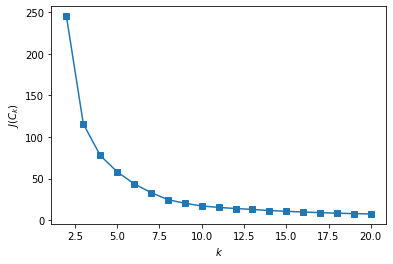

In [34]:
inertia = calculate_wcss(Z)
opt_n_clusters= optimal_number_of_clusters(inertia)

print(f'Optimal Number of Clusters : {opt_n_clusters}')
plt.Figure(figsize = (24,16))
plt.plot(range(2, 21), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Agora que tenho o número ótimo de clusters(6), irei rodar o algoritmo k-means em dois diferentes estados de aleatoriedade, pois assim os centroides serão inicializados de maneira diferente e aleatoria.
<br/>
<br/>
Depois irei escolher dois diferentes números de cluster e comparar os resultados. A métrica de avaliação será o método da Silhueta

<br/>
<br/>
<br/>

**Silhueta:**

A silhueta de uma amostra é o valor médio dos valores de silhueta dessa amostra. Portanto, a distância da silhueta mostra até que ponto a distância entre os objetos da mesma classe difere da distância média entre os objetos de diferentes clusters. Esse coeficiente tem como intervalo [-1,1], em que 1 é considerado um agrupamento bem definido.

K = 6		Silhouette Score=93.8%
Random State: 52

   Cluster  Frequency
0        0        638
1        1        308
2        2        339
3        3        156
4        4       4934
5        5        531




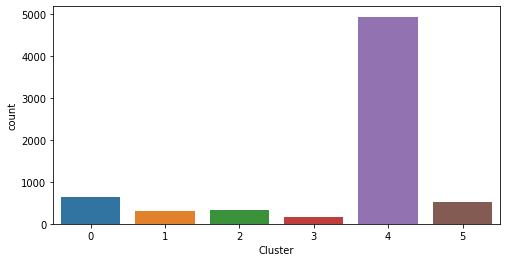





K = 6		Silhouette Score=93.7%
Random State: 89

   Cluster  Frequency
0        0        531
1        1       4934
2        2        156
3        3        638
4        4        339
5        5        308




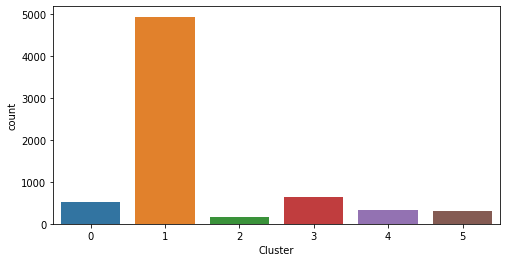

In [39]:
K = opt_n_clusters

for i in [52,89]:
    kmeans = KMeans(n_clusters=K, random_state = i)
    kmeans.fit(Z)
    labels = kmeans.labels_
    cluster_k, counter = np.unique(labels,return_counts=True)
    d = dict(zip(cluster_k, counter))
    l = list(d.items())
    d_df = pd.DataFrame(l, columns = ['Cluster','Frequency'])
    k_df = pd.DataFrame(labels, columns = ['Cluster'])
    z_df = pd.DataFrame(Z)
    
    km_ = z_df.assign(cluster_number= kmeans.predict(z_df))
    sl = sklearn.metrics.silhouette_score(km_, labels=km_["cluster_number"])
    print(f'K = {K}\t\tSilhouette Score={round(sl,3)*100}%')
    print(f'Random State: {i}\n')
    print(d_df)
    print(f'\n')
    plt.figure(figsize = (8,4))
    sns.countplot(k_df['Cluster'])

        
    plt.show()
    print(f'\n\n\n')

Utilizando diferentes números de K:

K = 4		Silhouette Score=92.5%
Random State: 52

   Cluster  Frequency
0        0       5708
1        1        214
2        2        447
3        3        537




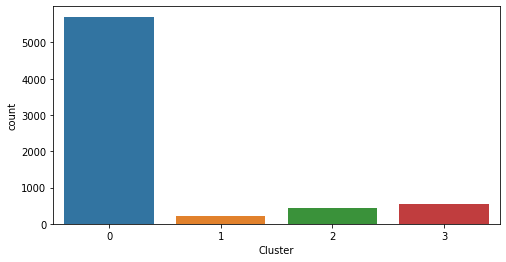





K = 4		Silhouette Score=92.5%
Random State: 89

   Cluster  Frequency
0        0       5708
1        1        213
2        2        447
3        3        538




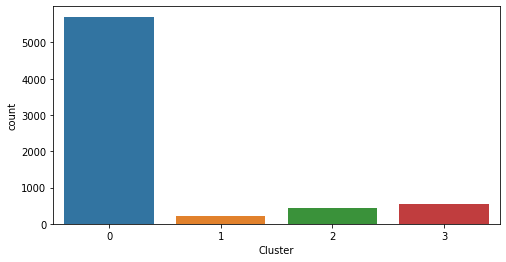





K = 8		Silhouette Score=95.3%
Random State: 52

   Cluster  Frequency
0        0        809
1        1        269
2        2       4647
3        3        201
4        4        158
5        5        497
6        6         90
7        7        235




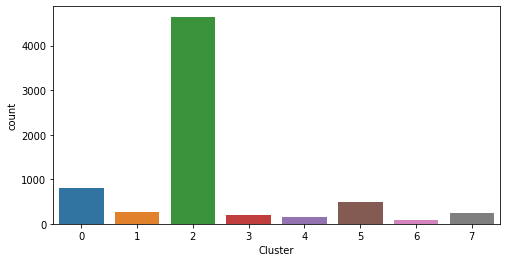





K = 8		Silhouette Score=95.39999999999999%
Random State: 89

   Cluster  Frequency
0        0       4647
1        1         90
2        2        235
3        3        497
4        4        158
5        5        201
6        6        809
7        7        269




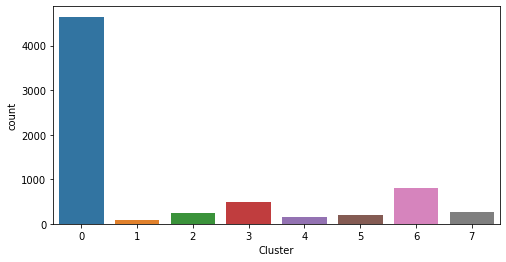

In [50]:
for K in [4,8]:
    for i in [52,89]:
        kmeans = KMeans(n_clusters=K, random_state = i)
        kmeans.fit(Z)
        labels = kmeans.labels_
        cluster_k, counter = np.unique(labels,return_counts=True)
        d = dict(zip(cluster_k, counter))
        l = list(d.items())
        d_df = pd.DataFrame(l, columns = ['Cluster','Frequency'])
        k_df = pd.DataFrame(labels, columns = ['Cluster'])
        z_df = pd.DataFrame(Z)

        km_ = z_df.assign(cluster_number= kmeans.predict(z_df))
        sl = sklearn.metrics.silhouette_score(km_, labels=km_["cluster_number"])
        print(f'K = {K}\t\tSilhouette Score={round(sl,3)*100}%')
        print(f'Random State: {i}\n')
        print(d_df)
        print(f'\n')
        plt.figure(figsize = (8,4))
        sns.countplot(k_df['Cluster'])


        plt.show()
        print(f'\n\n\n')

Como é possível perceber, com diferentes inicializações de centroides os resultados variam, podem aumentar ou diminuir o resultado do coeficiente de Silhueta. Assim como a distribuição entre os clusters.
<br/>
O resultado com melhor coeficiente de Silhueta foi k= 7 com random_state = 89

### **Clustering Aglomerativo**:

Existem diferentes tipos de agrupamento hierárquico, irei utilizar dois deles.

1. Complete Linkage: A distância máxima entre indivíduos entre objetos em cada grupo representa a menor esfera. Tende a produzir grupos mais compactos
2. Single Linkage: A distância mínima entre indivíduos entre objetos em cada grupo representa a menor esfera. Tende a produzir alongados.

K = 4		Silhouette Score=90.4%
   Cluster  Frequency
0        0        465
1        1        174
2        2        234
3        3       6033


Linkage: complete


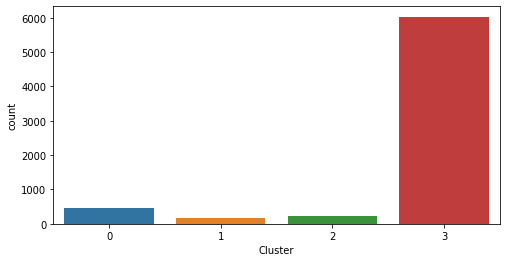





K = 6		Silhouette Score=91.0%
   Cluster  Frequency
0        0       6033
1        1         94
2        2        234
3        3         61
4        4        371
5        5        113


Linkage: complete


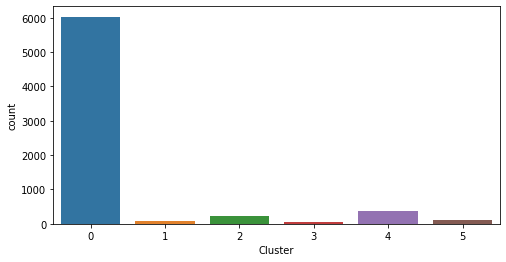





K = 8		Silhouette Score=93.0%
   Cluster  Frequency
0        0        234
1        1        371
2        2        113
3        3         61
4        4       5819
5        5         37
6        6        214
7        7         57


Linkage: complete


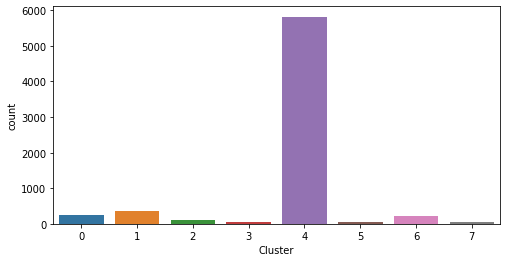





K = 4		Silhouette Score=80.60000000000001%
   Cluster  Frequency
0        0       6903
1        1          1
2        2          1
3        3          1


Linkage: single


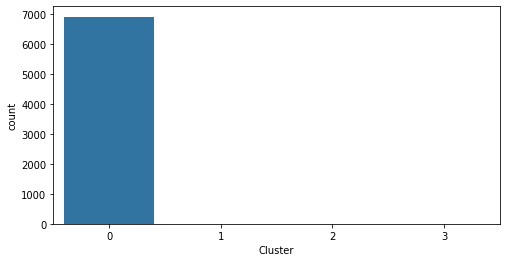





K = 6		Silhouette Score=80.60000000000001%
   Cluster  Frequency
0        0       6901
1        1          1
2        2          1
3        3          1
4        4          1
5        5          1


Linkage: single


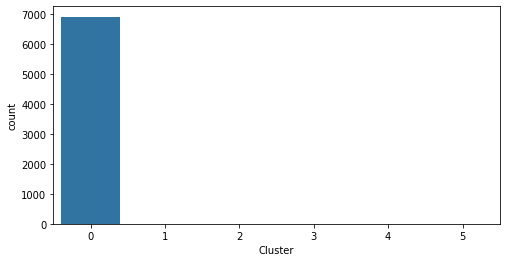





K = 8		Silhouette Score=79.7%
   Cluster  Frequency
0        0       6897
1        1          2
2        2          2
3        3          1
4        4          1
5        5          1
6        6          1
7        7          1


Linkage: single


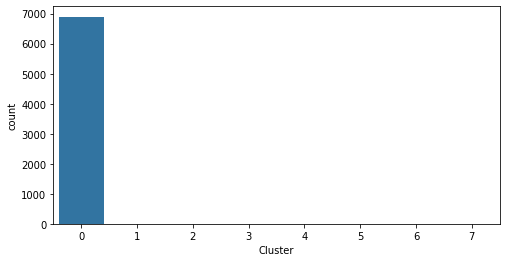

In [58]:
K = opt_n_clusters

for link in ['complete', 'single']:
    for K in [4,opt_n_clusters,8]:
       
        hierarq = AgglomerativeClustering(n_clusters=K, affinity='euclidean',linkage = link)    
        hierarq.fit(Z)

        labels = hierarq.labels_
        cluster_k, counter = np.unique(labels,return_counts=True)
        d = dict(zip(cluster_k, counter))
        l = list(d.items())
        d_df = pd.DataFrame(l, columns = ['Cluster','Frequency'])
        k_df = pd.DataFrame(labels, columns = ['Cluster'])
        z_df = pd.DataFrame(Z)

        km_ = z_df.assign(cluster_number= hierarq.fit_predict(z_df))
        sl = sklearn.metrics.silhouette_score(km_, labels=km_["cluster_number"])
        print(f'K = {K}\t\tSilhouette Score={round(sl,3)*100}%')
        print(d_df)
        print(f'\n')
        print(f'Linkage: {link}')
        plt.figure(figsize = (8,4))
        sns.countplot(k_df['Cluster'])
        plt.show()
        
        print(f'\n\n\n')

Como é possível observar com os resultados acima, para o clustering aglomerativo, os resultados de complete linkage foram melhores e seu número de K com melhor coeficiente de silhueta foi K= 8

## Comparação dos resultados e visualização com PCA:

In [60]:
pca = decomposition.PCA(n_components=2)
Z_PCA = pca.fit_transform(Z)

### **K-Means:**

K = 8		Silhouette Score=95.39999999999999%
Random State: 89



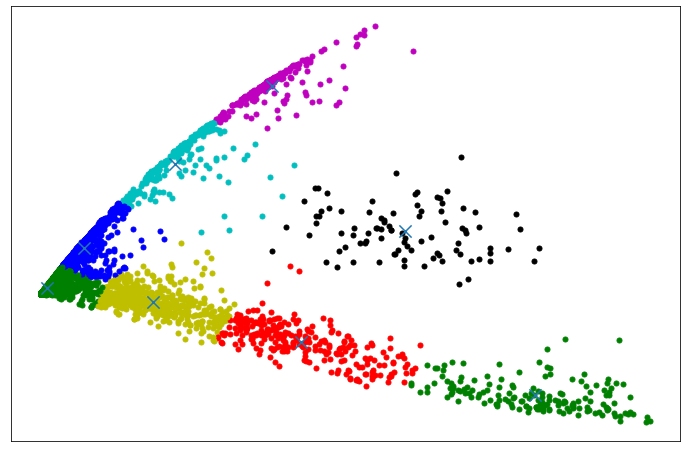

In [89]:
K = 8
i = 89
kmeans = KMeans(n_clusters=K, random_state = i)
kmeans.fit(Z_PCA)
labels = kmeans.labels_
cluster_k, counter = np.unique(labels,return_counts=True)
d = dict(zip(cluster_k, counter))
l = list(d.items())
d_df = pd.DataFrame(l, columns = ['Cluster','Frequency'])
k_df = pd.DataFrame(labels, columns = ['Cluster'])
z_df = pd.DataFrame(Z_PCA)

km_ = z_df.assign(cluster_number= kmeans.predict(z_df))
sl = sklearn.metrics.silhouette_score(km_, labels=km_["cluster_number"])
print(f'K = {K}\t\tSilhouette Score={round(sl,3)*100}%')
print(f'Random State: {i}\n')
colors = ["g.","r.","c.","y.","b.","m.","k.","g."]
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.figure(figsize = (12,8))
for i in range(len(Z_PCA)):
        plt.plot(Z_PCA[i][0], Z_PCA[i][1], colors[labels[i]], markersize = 10)

plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.xticks([])
plt.yticks([])
plt.show()
print(f'\n\n\n')

### **Agglomerative Clustering:**

In [90]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)
    colors = ["g.","r.","c.","y.","b.","m.","k.","g."]
    
    plt.figure(figsize=(12, 8))
    for i in range(X_red.shape[0]):
        plt.scatter(X_red[i, 0], X_red[i, 1],
                 color=plt.cm.nipy_spectral(labels[i] / 10.))

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

K = 8		Silhouette Score=92.60000000000001%


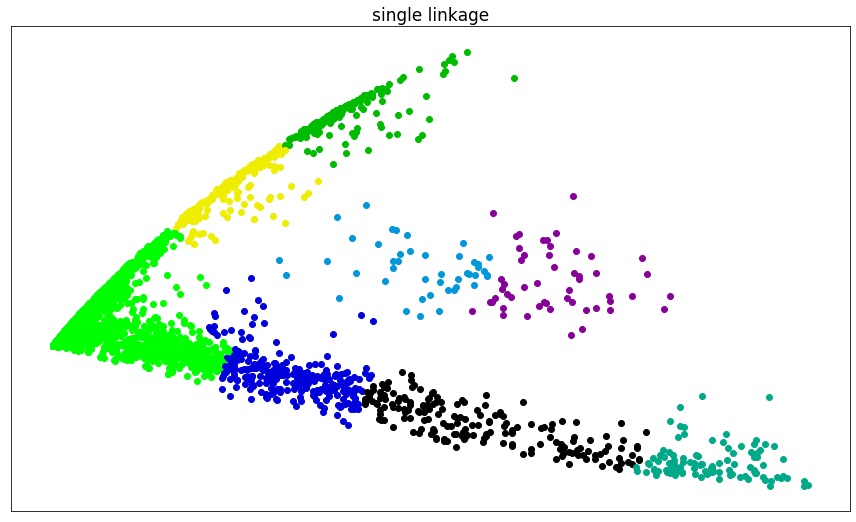

In [91]:
K = 8       
hierarq = AgglomerativeClustering(n_clusters=K, affinity='euclidean',linkage = 'complete')    
hierarq.fit(Z_PCA)

labels = hierarq.labels_
cluster_k, counter = np.unique(labels,return_counts=True)
d = dict(zip(cluster_k, counter))
l = list(d.items())
d_df = pd.DataFrame(l, columns = ['Cluster','Frequency'])
k_df = pd.DataFrame(labels, columns = ['Cluster'])
z_df = pd.DataFrame(Z_PCA)

km_ = z_df.assign(cluster_number= hierarq.fit_predict(z_df))
sl = sklearn.metrics.silhouette_score(km_, labels=km_["cluster_number"])
print(f'K = {K}\t\tSilhouette Score={round(sl,3)*100}%')


plot_clustering(Z_PCA, hierarq.labels_, "%s linkage" % link)

print(f'\n\n\n')

Considerando os dados acima, é possível afirmar que o melhor resultado foi utilizando o algoritmo K-Means, de acordo com a métrica do coeficiente de silhueta, que mede o quão bem definido está o agrupamento.